Assignment 2A

In [4]:
from skimage import io, color, filters
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import  binary_closing, disk, opening, closing, dilation, white_tophat, binary_opening, ball, remove_small_objects, thin
from sklearn.metrics import jaccard_score
from skimage.transform import hough_line, hough_line_peaks

%matplotlib inline

1. (5 points) Load the color image (XXXXXX vesselimage.jpg). Using subplots, display each color channel
separately.

(<Axes: title={'center': 'Blue channel vessel image'}>,
 Text(0.5, 1.0, 'Blue channel vessel image'),
 (-0.5, 1499.5, 798.5, -0.5))

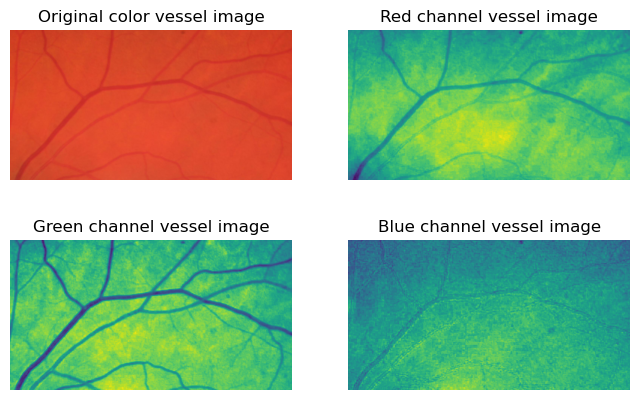

In [6]:
imgVessel = io.imread("2148497_vesselimage.jpg")

redChannel =  imgVessel[:,:,0]
greenChannel = imgVessel[:,:,1]
blueChannel = imgVessel[:,:,2]

plt.figure(figsize =(8,5))
plt.subplot(221), plt.imshow(imgVessel), plt.title("Original color vessel image"), plt.axis("off")
plt.subplot(222), plt.imshow(redChannel), plt.title("Red channel vessel image"), plt.axis("off")
plt.subplot(223), plt.imshow(greenChannel), plt.title("Green channel vessel image"), plt.axis("off")
plt.subplot(224), plt.imshow(blueChannel), plt.title("Blue channel vessel image"), plt.axis("off")


2. (5 points) Convert the color image to HSV and display the hue, saturation and value channels

(<Axes: title={'center': 'Value channel vessel image'}>,
 Text(0.5, 1.0, 'Value channel vessel image'),
 (-0.5, 1499.5, 798.5, -0.5))

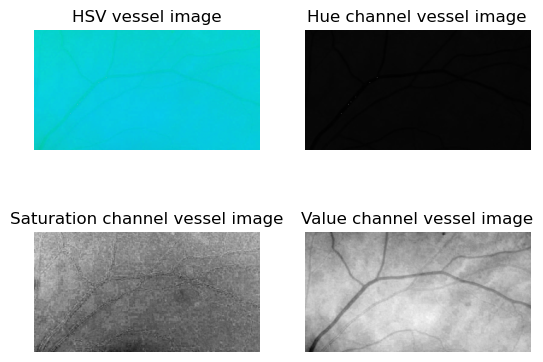

In [8]:
vesselHSV = color.rgb2hsv(imgVessel)

plt.figure()
plt.subplot(221), plt.imshow(vesselHSV), plt.title("HSV vessel image"), plt.axis("off")
plt.subplot(222), plt.imshow(vesselHSV[:,:,0],cmap = "gray"), plt.title("Hue channel vessel image"), plt.axis("off")
plt.subplot(223), plt.imshow(vesselHSV[:,:,1], cmap = "gray"), plt.title("Saturation channel vessel image"), plt.axis("off")
plt.subplot(224), plt.imshow(vesselHSV[:,:,2], cmap = "gray"), plt.title("Value channel vessel image"), plt.axis("off")


3. (10 points) Segment the vessels to obtain a binary image where pixels representing the vessels are set
to 1. You can apply morphological operations on these images.
Points breakdown: Full (10) points if your method successfully segments all the large vessels, most of
the smaller vessels and none of the background. Show the results for each step you took. If the vessel
shapes are slightly distorted or a 10% of the background is segmented or 50% of the smaller vessels are
missing, you will get a maximum of 7 points. If you make an attempt and the results are poor, you can
get a maximum of 5 points.

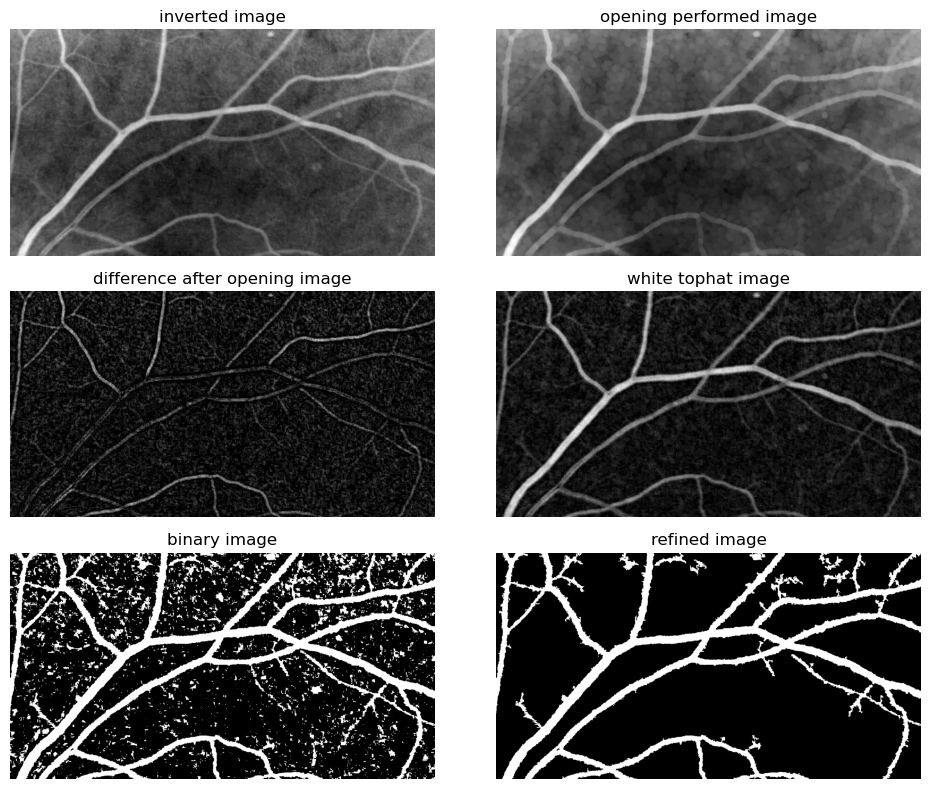

In [10]:
greyscaleVessel = color.rgb2gray(imgVessel)

invertVessel = 1 - greyscaleVessel
openVessel = opening(invertVessel, disk(7))
im2 = invertVessel - openVessel
im3 = white_tophat(invertVessel, disk(20)) #highlight  bright regions removed by opening 

binary_im3 = im3 > 0.015

binary_im3_cleaned = remove_small_objects(binary_im3, min_size=800)

plt.figure(figsize=(10,8))
plt.subplot(3,2,1), plt.imshow(invertVessel, cmap ="gray"), plt.axis("off"), plt.title("inverted image")
plt.subplot(3,2,2), plt.imshow(openVessel, cmap = "gray"), plt.axis("off"), plt.title("opening performed image")
plt.subplot(3,2,3), plt.imshow(im2, cmap = "gray"), plt.axis("off"), plt.title("difference after opening image")
plt.subplot(3,2,4), plt.imshow(im3, cmap = "gray"), plt.axis("off"), plt.title("white tophat image")
plt.subplot(3,2,5), plt.imshow(binary_im3, cmap ="gray"), plt.axis("off"), plt.title("binary image")
plt.subplot(3,2,6), plt.imshow(binary_im3_cleaned, cmap ="gray"), plt.axis("off"), plt.title("refined image")

plt.tight_layout()



4. (5 points) Overlay your segmentation solutions with the binary mask found in the image (XXXXXX vesselmask.jpg)
where XXXXX is your SSID. These are the manual annotation results.

(<matplotlib.image.AxesImage at 0x117ab6968d0>,
 Text(0.5, 1.0, 'Segmentation with Mask Overlay'),
 (-0.5, 1499.5, 798.5, -0.5))

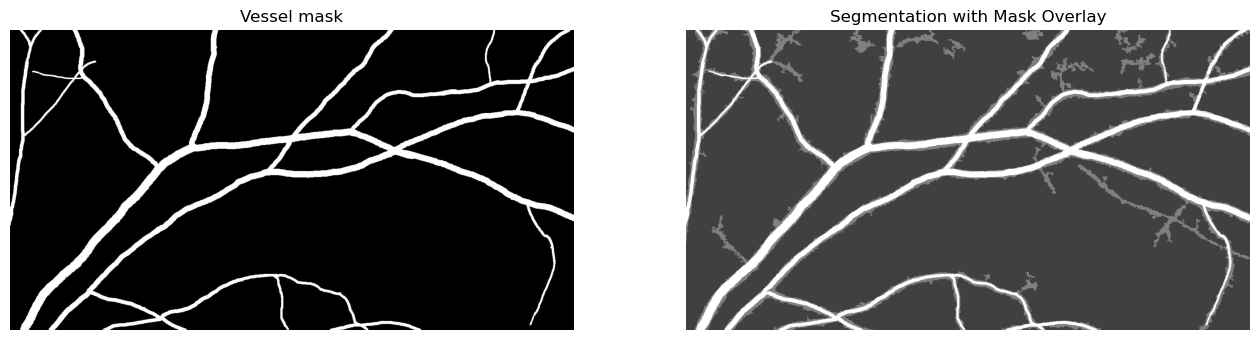

In [12]:
mask = io.imread("2148497_vesselmask.jpg")

plt.figure(figsize=(16,12))
plt.subplot(221), plt.imshow(mask, cmap="gray"), plt.title("Vessel mask"), plt.axis("off")

plt.subplot(222), 
plt.imshow(binary_im3_cleaned, cmap="gray", alpha=0.5), 
plt.imshow(mask, cmap="gray", alpha=0.5), plt.title("Segmentation with Mask Overlay"), plt.axis("off")

5. (5 points) Compute the Dice or Jaccard score between your solution and the binary mask.


In [14]:
im3_binary = (im3 > 0.05).astype(np.uint8)
mask_binary = (mask > 0).astype(np.uint8)
# chatgpt helped me to set a better threshold.
jaccard = jaccard_score(mask_binary.ravel(), im3_binary.ravel())
print(jaccard)

0.3919989222227737


Part 2B

1. (5 points) Remove smaller vessels (less than 8 pixels wide) with a morphological opening. Apply morphological thinning to obtain a 1-pixel thin centerline of the vascular network.


(<Axes: title={'center': 'After opening'}>,
 (-0.5, 1499.5, 798.5, -0.5),
 Text(0.5, 1.0, 'After opening'))

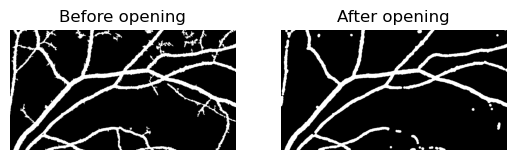

In [16]:
small_vess_rem = binary_opening(binary_im3_cleaned, disk(8))

plt.figure()
plt.subplot(121), plt.imshow(binary_im3_cleaned, cmap= "gray"), plt.axis("off"), plt.title("Before opening")
plt.subplot(122), plt.imshow(small_vess_rem, cmap= "gray"), plt.axis("off"), plt.title("After opening")


(<matplotlib.image.AxesImage at 0x117b6db94f0>,
 Text(0.5, 1.0, 'Thinned vessels'),
 (-0.5, 1499.5, 798.5, -0.5))

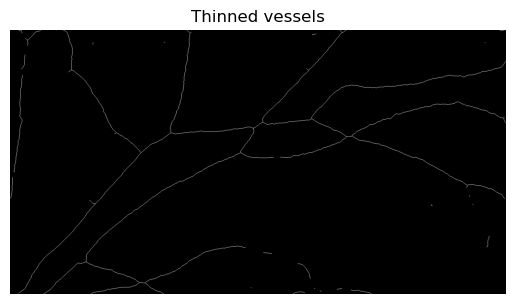

In [18]:
thinning_vessel = thin(small_vess_rem) 
plt.imshow(thinning_vessel, cmap = "gray"), plt.title("Thinned vessels"), plt.axis("off")

2. (5 points) Find the overall length of the vascular network (in pixels) in the image after thinning. This
is the total number of pixels which are set to 1 or True, after morphological thinning.


In [20]:
lenght_vessels = np.sum(thinning_vessel)
print(lenght_vessels)

6182


3. (5 points) Find the length of the vascular network that is larger than 40 pixels. Hint: You can apply a
medial axis transforms to compute the width of the vessel for each pixels in the skeleton.

4. (5 points) Compute the orientation of the vascular network in the image after thinning. Display the
orientation distribution of the vascular network in a polar (rose) plot.

(20,)
[2 1 0 0 0 0 0 0 0 1 1 0 0 0 3 0 0 2 0 4]


Text(0.5, 1.0, 'Rose plot')

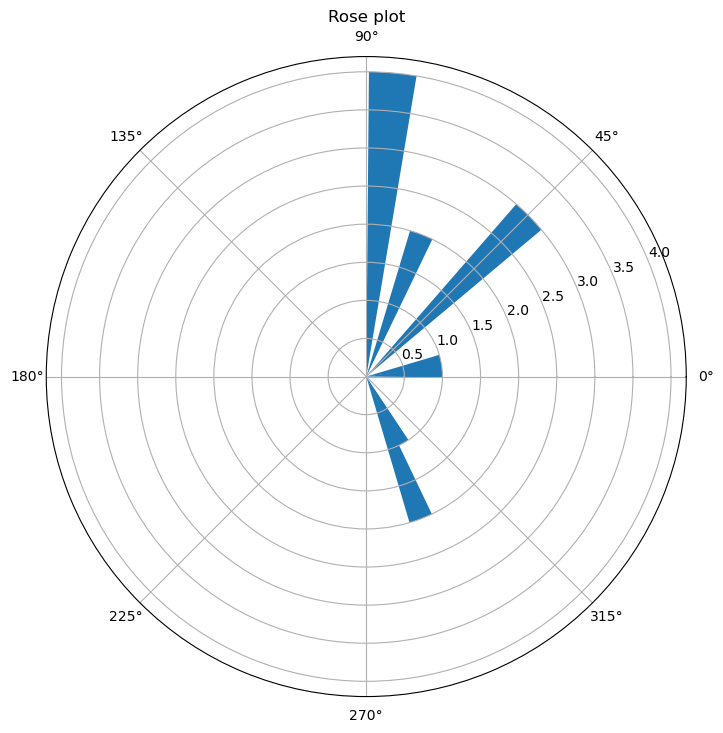

In [22]:
H, theta, rho = hough_line(thinning_vessel)
#H accumulator, theta are angles, rho are radial distance from origin
hspace, angles, dists = hough_line_peaks(H, theta, rho, num_peaks = 50)

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

#I tried to follow the exercise 2.2 in Practical 5
N = 20
radii = np.histogram(angles,bins=N)
atheta = np.linspace(min(angles), max(angles), N)
print(atheta.shape)
print(radii[0])

width = np.pi/N 
bars = plt.bar(atheta, radii[0], width=width, bottom=0.0)
ax.set_title("Rose plot")